# Assignment 1


*Please fill out the relevant cells below according to the instructions. When done, save the notebook and export it to PDF, upload both the `ipynb` and the PDF file to Canvas.*

## Group Members

*Group submission is highly encouraged. If you submit as part of group, list all group members here. Groups can comprise up to 5 students.*

* Adam Applegate
* Beatrix Brahms
* 

---

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

## Problem 1: Central Limit Theorem (2pts)

Use `scipy.stats` to draw $N$ samples from the uniform and the Cauchy distribution. Confirm whether the mean $\mu$ of these samples (which is itself a RV) has a distribution $p(\mu)$ that converges to a normal distribution when $N\rightarrow\infty$.

A simple way of testing for normality of the distribution of means is the [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), i.e. you expect that there are only about 5% of the means (of a draw of $N$ samples) that deviate from $\mathrm{mean}(\mu)$ by more than $2 \sqrt{\mathrm{var}(\mu)}$.

Visualization can be helpful but is itself not a sufficient conformation of normality!

## Problem 2: Game Show Strategy (3pts)

On a game show, a contestant is told the rules as follows:
> There are three doors, labelled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the game show host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.
> At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.

Imagine that the contestant chooses door 1 first; then the game show host opens door 3, revealing nothing behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 2, or (c) does it make no difference?

Justify your answer, either by writing code or equations with text, or both.

Tip: Use Bayes Theorem, enumerate all options, and think about information flow.

## Problem 3: Likelihood vs Prior (1pt)

Leveraging again `scipy.stats`, reproduce the figure below. In detail, choose [Student's t distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t) with 4 degrees of freedom and the standard normal distribution for either the posterior or the prior, but separate them by $\delta x=10$. Compute and plot the posteriors.

Which of these prior distributions is more robust to outliers in the data?

In [1]:
import requests

class Tweet(object):
    def __init__(self, s, embed_str=False):
        if not embed_str:
            # Use Twitter's oEmbed API
            # https://dev.twitter.com/web/embedded-tweets
            api = 'https://publish.twitter.com/oembed?url={}'.format(s)
            response = requests.get(api)
            self.text = response.json()["html"]
        else:
            self.text = s

    def _repr_html_(self):
        return self.text

Tweet("https://twitter.com/avehtari/status/1218896617346162688?s=20")

## response

We know that according to Bayes' rule, our posterior distribution takes the following form:
$$ \mathbb{P}(\theta\ |\  \mathcal{D}) = \frac{\mathbb{P}(\mathcal{D}\ |\ \theta) \mathbb{P}(\theta)}{\mathbb{P}(\mathcal{D})}$$
where 
- $\mathbb{P}(\mathcal{D}\ |\ \theta)$ is the likelihood of observing $\mathcal{D}$ given the model parameters $\theta$
- $\mathbb{P}(\theta)$ is the prior distribution over possible parameters $\theta$
- $\mathbb{P}(\mathcal{D}) = \int \mathbb{P}(\mathcal{D}\ |\ \theta) \mathbb{P}(\theta) d\theta$ is the *evidence* or normalization

In [2]:
import numpy as np
import scipy.integrate
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(-100, 100, 100000)

likelihoods = [ss.norm(loc=5, scale=1).pdf(x), ss.t(loc=5, df=4).pdf(x), ss.t(loc=5, df=4).pdf(x)]
priors = [ss.t.pdf(x, loc=-5, df=4), ss.norm.pdf(x, loc=-5, scale=1), ss.t.pdf(x, loc=-5, df=4)]
posteriors = [likelihoods[i] * priors[i] for i in range(len(priors))]
evidence =  [np.dot(x,likelihoods[i]) for i in range(len(likelihoods))]

# plot params
colors = ['b', 'r', 'm']
prior_types = ['t4', 'N', 't4']
like_types = ['N', 't4', 't4']

Text(0.5, 0, '${x}$')

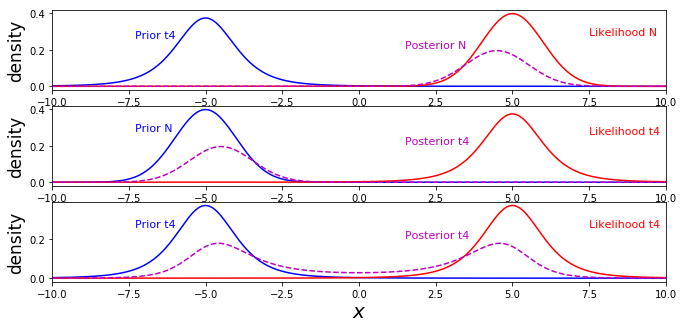

In [4]:
fig,axs = plt.subplots(3, 1, figsize=(11,5))
for i in range(len(axs)):
    axs[i].plot(x, priors[i], color='b')
    axs[i].plot(x, likelihoods[i], color='r')
    axs[i].plot(x, posteriors[i]*4000, color='m', linestyle='--')
    axs[i].text(-7.3, np.max(priors[i])*0.7, s='Prior ' + prior_types[i], color='b', fontsize=11)  # label priors
    axs[i].text(7.5, np.max(likelihoods[i])*0.7, s='Likelihood ' + like_types[i], color='r', fontsize=11)  # label likes
    axs[i].text(1.5, np.max(posteriors[i])*200*0.9 + 0.2, s='Posterior ' + like_types[i], color='m', fontsize=11)  # label likes
    axs[i].set_ylabel('density', fontsize=17)
    axs[i].set_xlim(-10, 10)

    
plt.xlabel(r'${x}$', fontsize=20)


We see that the third model is more robust to outliers, since the posterior surface is peaked both at "donkey" $x=-5$ and "horse", $x=5$, such that the probability of seeing a mule at $x=0$ is very low.

## Problem 4: Hubble was no Bayesian (4pts)

...but you can be!

In 1929, Edwin Hubble published a seminal [paper](http://www.pnas.org/content/pnas/15/3/168.full.pdf), in which he compared the radial velocity of astronomical objects (i.e. how fast these objects move towards or away from us) with their distance. The former can be done pretty precisely with spectroscopy, the latter is much more uncertain. His original data are attached to this Assignment on Canvas.

He saw that the velocity increases with distance and speculated that this could be the sign of a cosmological expansion. This lead cosmologist to believe in the Big Bang theory.

### Step 0:

Load the data into an array with `numpy.genfromtxt`, make use of its arguments `names` and `dtype` to read in the column names from the header and choosing the data type on its own as needed. You should get 6 columns
   * `CAT`, `NUMBER`:  These two combined give you the name of the galaxy.
   * `R`: distance in Mpc
   * `V`: radial velocity in km/s
   * `RA`, `DEC`: equatorial coordinates of the galaxy
   
Make a scatter plot of $R$ vs $V$. Don't forget labels and units...

In [5]:
array = np.genfromtxt('catalog.txt', delimiter='', names=True, dtype=('S12', 'S12', float, float, 'S12', 'S12'))
array

array([(b'Mag', b'S', 0.032,  170., b'00:51:00', b'-73:06:00'),
       (b'Mag', b'L', 0.034,  290., b'05:24:00', b'-69:48:00'),
       (b'NGC', b'6822', 0.214, -130., b'19:44:58', b'-14:48:12'),
       (b'NGC', b'598', 0.263,  -70., b'01:31:02', b'30:24:15'),
       (b'NGC', b'221', 0.275, -185., b'00:39:58', b'40:35:20'),
       (b'NGC', b'224', 0.275, -220., b'00:40:00', b'40:59:43'),
       (b'NGC', b'5457', 0.45 ,  200., b'14:01:26', b'54:35:18'),
       (b'NGC', b'4736', 0.5  ,  290., b'12:48:32', b'41:23:32'),
       (b'NGC', b'5194', 0.5  ,  270., b'13:27:46', b'47:27:10'),
       (b'NGC', b'4449', 0.63 ,  200., b'12:25:45', b'44:22:12'),
       (b'NGC', b'4214', 0.8  ,  300., b'12:13:09', b'36:36:17'),
       (b'NGC', b'3031', 0.9  ,  -30., b'09:51:27', b'69:18:08'),
       (b'NGC', b'3627', 0.9  ,  650., b'11:17:39', b'13:15:56'),
       (b'NGC', b'4826', 0.9  ,  150., b'12:54:16', b'21:57:12'),
       (b'NGC', b'5236', 0.9  ,  500., b'13:34:12', b'-29:36:39'),
       (b'NGC',

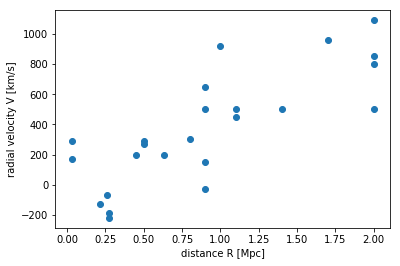

In [6]:
plt.figure()
plt.ylabel('radial velocity V [km/s]')
plt.xlabel('distance R [Mpc]')
plt.scatter(array['R'], array['V'])

### Step 1 (1pt):

Use linear regression to determine the MLE of the slope $b$ for the line $R=b V$. This is a linear model **with no intercept**. Print the MLE. Then, create a new version of the scatter plot by adding the MLE line.

Tip: You don't need measurement uncertainties (there aren't any in Hubble's data) to determine the MLE.

In [7]:
import scipy

In [8]:
theta_mle = np.dot(np.transpose(array['V']), (array['R']))/np.dot(np.transpose(array['V']), (array['V']))
print('theta_MLE = '+ str(theta_mle))

theta_MLE = 0.0019218059027017896


In [9]:
from scipy.optimize import curve_fit

def linear_fn(x, a, b):
    return a*x + b

In [10]:
pars,cov = curve_fit(linear_fn, array['V'], array['R'])

In [11]:
a_mle, b_mle = pars

In [12]:
velocities = np.linspace(0, 1050, 100)

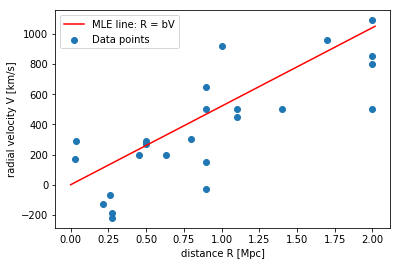

In [13]:
plt.figure()
plt.ylabel('radial velocity V [km/s]')
plt.xlabel('distance R [Mpc]')
plt.scatter(array['R'], array['V'], label = 'Data points')
plt.plot(theta_mle*velocities, velocities, 'r', label = 'MLE line: R = bV')
#plt.errorbar(array['R'], array['V'], y_err, marker='o', linestyle='none', label = 'Sample ERRORs')
plt.legend(loc = 'best')

### Step 2 (2pts):

The full Gaussian likelihood of the linear regression problem has a term for the intercept $a$, slope $b$, and *uncertainty* $\sigma$ o|f $R$. We will assume that the uncertainties of all data points are identical. Adopt maximally uniformative priors for all of the parameters $\theta=(a,b,\sigma)$.

Compute the log posterior on a reasonably fine grid of $(a,b,\sigma)$, picking suitable limits for every parameter. Then marginalize out $\sigma$ and plot the log posterior for the remaining parameters $(a,b)$.

Tip: The function `scipy.special.logsumexp` is useful.

In [14]:
def log_likelihood(params, x, y):
    # compute prior part
    a = params[0]
    b = params[1]
    sigma = params[2]
    log_prior = (-3/2)*np.log(1+ b**2) - np.log(sigma)
    
    y_params = a + b*x
    log_likelihood = (-1/2)*np.sum(np.log(2*np.pi*(sigma**2)) + ((y - y_params)**2)/(sigma**2))
    
    log_posterior = log_prior + log_likelihood
    return log_posterior

In [15]:
y_params = theta_mle*array['V']
print(y_params)
print(array['R'])
print(np.sum(array['R'] - y_params)**2 +1)

[ 0.326707    0.55732371 -0.24983477 -0.13452641 -0.35553409 -0.4227973
  0.38436118  0.55732371  0.51888759  0.38436118  0.57654177 -0.05765418
  1.24917384  0.28827089  0.96090295  1.76806143  0.86481266  0.96090295
  0.96090295  1.84493367  0.96090295  1.63353502  1.53744472  2.09476843]
[0.032 0.034 0.214 0.263 0.275 0.275 0.45  0.5   0.5   0.63  0.8   0.9
 0.9   0.9   0.9   1.    1.1   1.1   1.4   1.7   2.    2.    2.    2.   ]
22.745696697863306


## least squares estimates of maxima & minima

We want to get an idea of where our $a$ and $b$ parameters are going to be with respect to one another before we run an inference on $\theta = \{a, b, \sigma \}$. We can obtain a (biased) estimate of $a$ and $b$ if we approximate $\hat{\sigma} = Var(R)$

In [16]:
# get an estimate for variances of data (will be biased)
y_err = np.ones(len(array['R'])) * np.std(array['R'])
y = array['R']

# design matrix X = [[1, 1, ...]^T, [V_1, V_2, ...]^T]
X = np.vander(array['V'], N=2, increasing=True)

# assume diagonal covariance matrix (independent observations)
Cov = np.diag(y_err**2)
Cinv = np.linalg.inv(Cov) # invert covariance matrix

# get the parameter covariance matrix ...
pars_Cov = np.linalg.inv(X.T @ Cinv @ X)

# and the best parameters using the new Python matrix operator
best_pars = pars_Cov @ (X.T @ Cinv @ y)
a_ls, b_ls = best_pars
print ("a, b = {}, {}".format(*best_pars))
print("sigma estimate from data: ", np.std(array['R']))

a, b = 0.39909821584359206, 0.0013729361049417965
sigma estimate from data:  0.6319048459815765


In [17]:
# make a 120x120 grid of parameter values with reasonable limits
a_grid = np.linspace(a_ls-2, a_ls+2, 120)
b_grid = np.linspace(b_ls-0.01, b_ls+0.01, 120)
sigma_grid = np.linspace(0.01, 10, 120)
a_grid,b_grid, sigma_grid = np.meshgrid(a_grid, b_grid, sigma_grid)
abs_grid = np.vstack((a_grid.ravel(), b_grid.ravel(), sigma_grid.ravel())).T

In [18]:
# compute log posterior on the 3d grid
func_vals = np.zeros(abs_grid.shape[0])
for j,pars in enumerate(abs_grid):
        func_vals[j] = log_likelihood(pars, array['V'], array['R'])

In [19]:
# marginalize out sigma by summing (integrating) along axis
func_vals_new = func_vals.reshape(sigma_grid.shape)
margin_sigma = scipy.special.logsumexp(func_vals_new, axis = 2)
margin_sigma;

In [20]:
np.exp(margin_sigma)

array([[7.35408920e-35, 8.13426858e-35, 8.99913747e-35, ...,
        1.61603708e-29, 1.76281138e-29, 1.92094892e-29],
       [9.98331302e-35, 1.10573953e-34, 1.22498112e-34, ...,
        2.63386366e-29, 2.87430563e-29, 3.13329149e-29],
       [1.35991244e-34, 1.50834186e-34, 1.67337300e-34, ...,
        4.33021829e-29, 4.72729008e-29, 5.15482045e-29],
       ...,
       [5.15441014e-29, 4.72691381e-29, 4.32987362e-29, ...,
        1.67323980e-34, 1.50822180e-34, 1.35980419e-34],
       [3.13303776e-29, 2.87407287e-29, 2.63365037e-29, ...,
        1.22488192e-34, 1.10564998e-34, 9.98250456e-35],
       [1.92079070e-29, 1.76266619e-29, 1.61590397e-29, ...,
        8.99839627e-35, 8.13359861e-35, 7.35348348e-35]])

## plot the mesh grid

(-0.0025, 0.0075)

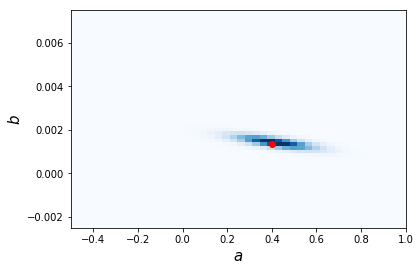

In [22]:
a_grid = np.linspace(a_ls-2, a_ls+2, 120)
b_grid = np.linspace(b_ls-0.01, b_ls+0.01, 120)
a_grid,b_grid = np.meshgrid(a_grid, b_grid)
fig,ax = plt.subplots(1, 1)
ax.pcolormesh(a_grid, b_grid, np.exp(margin_sigma.reshape(a_grid.shape)), 
                cmap='Blues', vmin=np.exp(margin_sigma).min(), vmax=np.exp(margin_sigma).max()) # arbitrary scale
plt.scatter(a_ls, b_ls, marker='o', color='r')

plt.xlabel(r'$a$', fontsize=15)
plt.ylabel(r'$b$', fontsize=15)

plt.xlim(-0.5, 1.0)
plt.ylim(-0.0025, 0.0075)

### Step 3 (1pt):

Use the function `sample_2d` below to draw samples from the 2D array of the posterior of $(a,b)$. Create a final version of the scatter plot by adding the lines that correspond to these posterior draws.

Tip: When plotting, set the transparency `alpha` to values < 1, so that multiple draws of the same parameter pair become visually more important.

In [23]:
# taken from https://stackoverflow.com/questions/56017163/given-a-2d-numpy-array-representing-a-2d-distribution-how-to-sample-data-from-t
def sample_2d(dist2d, n=50):
    """
    Given an array representing a 2D joint probability distribution p(x,y), return n index pairs (i_x, i_y) sampled
    according to that distribution
    """
    import numpy as np

    shape = dist2d.shape
    N = np.prod(shape)
    
    # generate the set of all x,y pairs represented by the pmf
    pairs=np.indices(dimensions=shape).T # here are all of the x,y pairs 

    # make n random selections from the flattened pmf without replacement
    # whether you want replacement depends on your application
    inds = np.random.choice(np.arange(N), p=dist2d.reshape(-1), size=n, replace=True)

    # inds is the set of n randomly chosen indicies into the flattened dist array...
    # therefore the random x,y selections
    # come from selecting the associated elements
    # from the flattened pairs array
    return pairs.reshape(-1,2)[inds]

In [24]:
# "normalize" our likelihood surface --> don't forget to exponentiate !
margin_pdf = np.exp(margin_sigma) / np.sum(np.exp(margin_sigma))

In [31]:
par_draws = sample_2d(margin_pdf, n=100)

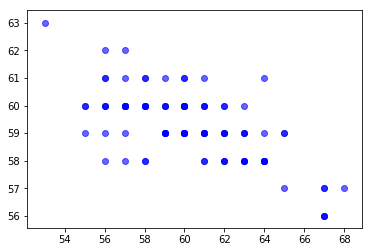

In [32]:
# visualize the drawn indexes on top of the mesh
for pair in par_draws:
    plt.scatter(pair[0], pair[1], color='b', alpha=0.6)

In [33]:
# for plotting
v = np.linspace(-200, 1000, num=1000)
r = np.linspace(0, 2, num=1000)

In [34]:
# plot r on x axis
def linear_fn(x, a, b):
    return a + b*x

(0, 1000)

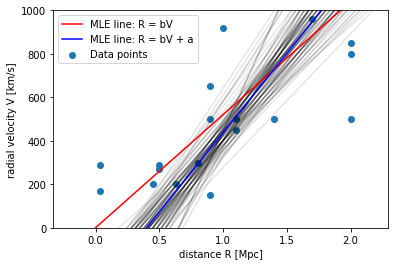

In [35]:
a_grid = np.linspace(a_ls-2, a_ls+2, 120)
b_grid = np.linspace(b_ls-0.01, b_ls+0.01, 120)
plt.figure()
plt.ylabel('radial velocity V [km/s]')
plt.xlabel('distance R [Mpc]')
plt.scatter(array['R'], array['V'], label = 'Data points')

#plt.errorbar(array['R'], array['V'], y_err, marker='o', linestyle='none', label = 'Sample ERRORs')
plt.legend(loc = 'best')
for pair in range(len(par_draws)):    
    plt.plot(linear_fn(v, a_grid[par_draws[pair][0]], b_grid[par_draws[pair][1]]), v, c='k', alpha=0.1)
    

plt.plot(theta_mle*velocities, velocities, 'r', label = 'MLE line: R = bV')
plt.plot(linear_fn(v, a_ls, b_ls), v, 'b', label = 'MLE line: R = bV + a')
plt.legend()
plt.ylim(0, 1000)

## now make a fancy plot to show a 2-$\sigma$ credible region from our draws

(0, 1000)

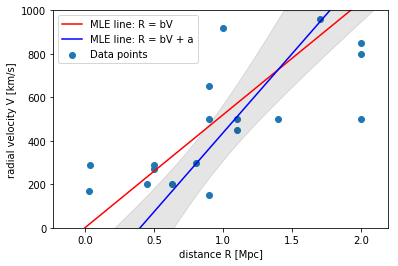

In [36]:
a_grid = np.linspace(a_ls-2, a_ls+2, 120)
b_grid = np.linspace(b_ls-0.01, b_ls+0.01, 120)
plt.figure()
plt.ylabel('radial velocity V [km/s]')
plt.xlabel('distance R [Mpc]')
plt.scatter(array['R'], array['V'], label = 'Data points')

#plt.errorbar(array['R'], array['V'], y_err, marker='o', linestyle='none', label = 'Sample ERRORs')
plt.legend(loc = 'best')

drawn_fns = np.array([linear_fn(v, a_grid[par_draws[pair][0]], b_grid[par_draws[pair][1]]) for pair in range(len(par_draws))])

   
plt.fill_betweenx(v, 
                  np.mean(drawn_fns, axis=0) + 2*np.std(drawn_fns, axis=0), 
                  np.mean(drawn_fns, axis=0) - 2*np.std(drawn_fns, axis=0), 
                  color='k', alpha=0.1)

plt.plot(theta_mle*velocities, velocities, 'r', label = 'MLE line: R = bV')
plt.plot(linear_fn(v, a_ls, b_ls), v, 'b', label = 'MLE line: R = bV + a')
plt.legend()
plt.ylim(0, 1000)